In [1]:
import pandas as pd

df = pd.read_csv("ES (1).csv")

df

,time_est_stripped,open,high,low,close
0,5/21/2021 15:00,4160.00,4165.25,4150.00,4152.50
1,5/24/2021 9:00,4174.75,4185.00,4173.50,4184.75
2,5/24/2021 10:00,4184.75,4198.25,4184.75,4196.25
3,5/24/2021 11:00,4196.25,4200.00,4194.00,4195.25
4,5/24/2021 12:00,4195.50,4197.50,4192.00,4196.00
...,...,...,...,...,...
7336,7/7/2025 15:00,6269.50,6278.00,6261.50,6275.50
7337,7/8/2025 9:00,6282.25,6284.25,6272.75,6274.75
7338,7/8/2025 10:00,6274.25,6282.50,6262.50,6271.75
7339,7/8/2025 11:00,6271.75,6279.75,6264.50,6278.00


In [2]:
df["ts"] = pd.to_datetime(df["time_est_stripped"], format="%m/%d/%Y %H:%M")
df = df.drop(columns="time_est_stripped")
df = df.rename(columns = {"ts": "timestamp"})
df = df.set_index("timestamp").sort_index()

df

,open,high,low,close
timestamp,,,,
2021-05-21 15:00:00,4160.00,4165.25,4150.00,4152.50
2021-05-24 09:00:00,4174.75,4185.00,4173.50,4184.75
2021-05-24 10:00:00,4184.75,4198.25,4184.75,4196.25
2021-05-24 11:00:00,4196.25,4200.00,4194.00,4195.25
2021-05-24 12:00:00,4195.50,4197.50,4192.00,4196.00
...,...,...,...,...
2025-07-07 15:00:00,6269.50,6278.00,6261.50,6275.50
2025-07-08 09:00:00,6282.25,6284.25,6272.75,6274.75
2025-07-08 10:00:00,6274.25,6282.50,6262.50,6271.75


In [3]:
ideal = pd.date_range(df.index.min(), df.index.max(), freq="60min") #basically creates a df of all hours from df.index.min() to df.index.max()
missing = ideal.difference(df.index)

print("Missing hourly bars:", len(missing))
missing

all_hrs = pd.date_range(df.index.min(), df.index.max(), freq="60min")
mask_weekday = all_hrs.weekday < 5
mask_hour = (all_hrs.hour >=9) & (all_hrs.hour <= 15)
trading_hrs = all_hrs[mask_weekday & mask_hour]
missing_trading = trading_hrs.difference(df.index)
len(missing_trading)

Missing hourly bars: 28873


196

In [4]:
import numpy as np 

df["ret"] = df["close"].pct_change().fillna(0) #pct_change computes (current-previous)/previous
df["log_ret"] = np.log1p(df["ret"])
print(df[["ret","log_ret"]].agg(["mean","std","skew","kurtosis"]))


                ret    log_ret
mean       0.000065   0.000056
std        0.004160   0.004155
skew       0.543774   0.418306
kurtosis  19.052513  17.896322


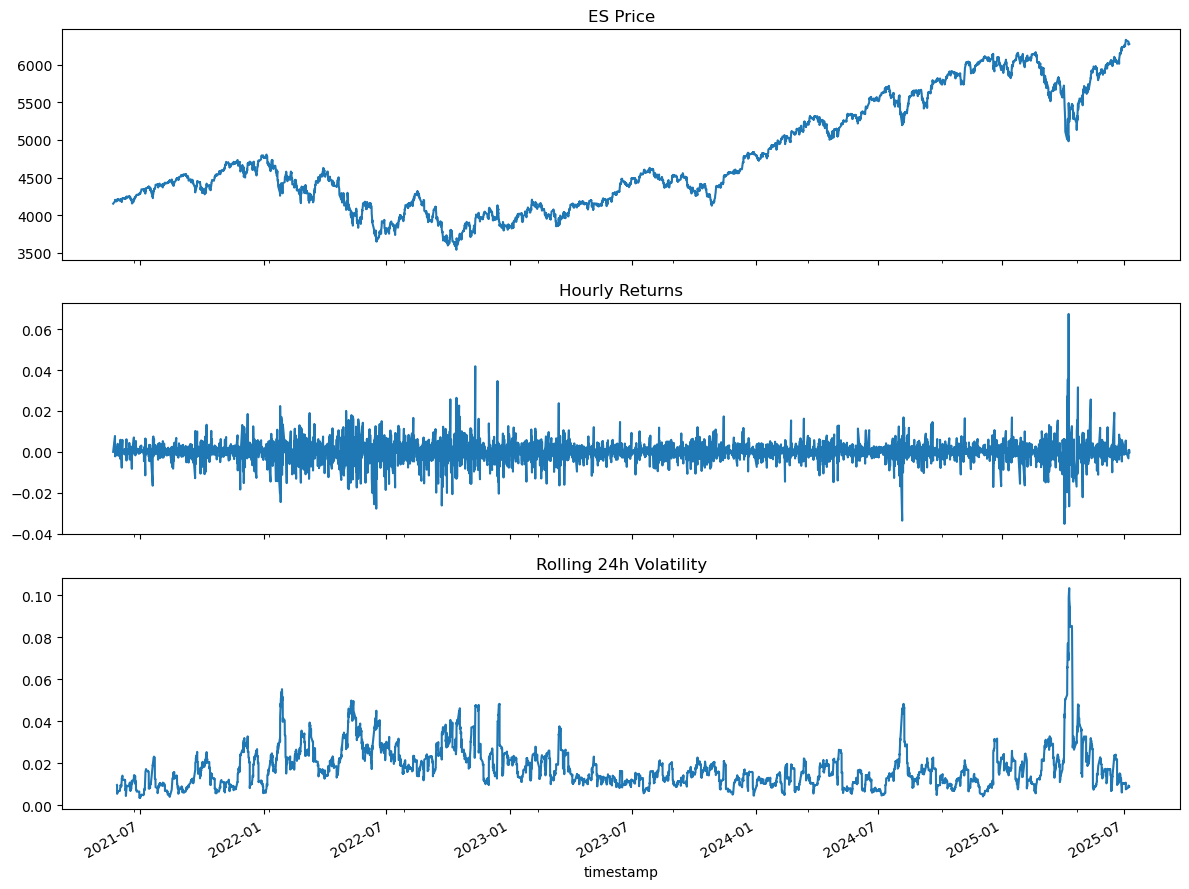

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,1, figsize=(12, 9), sharex=True)
df["close"].plot(ax=axes[0], title="ES Price")
df["ret"].plot(ax=axes[1], title="Hourly Returns")
df["vol_24h"] = df["ret"].rolling(24).std() * (24**0.5)
df["vol_24h"].plot(ax=axes[2], title="Rolling 24h Volatility")
plt.tight_layout()
plt.show()


In [6]:
by_hour = df.groupby(df.index.hour)["ret"].agg(["mean","std"])
print(by_hour)


               mean       std
timestamp                    
9          0.000264  0.007338
10        -0.000099  0.003807
11         0.000120  0.003040
12        -0.000036  0.002602
13         0.000108  0.003620
14         0.000090  0.002998
15         0.000006  0.003758


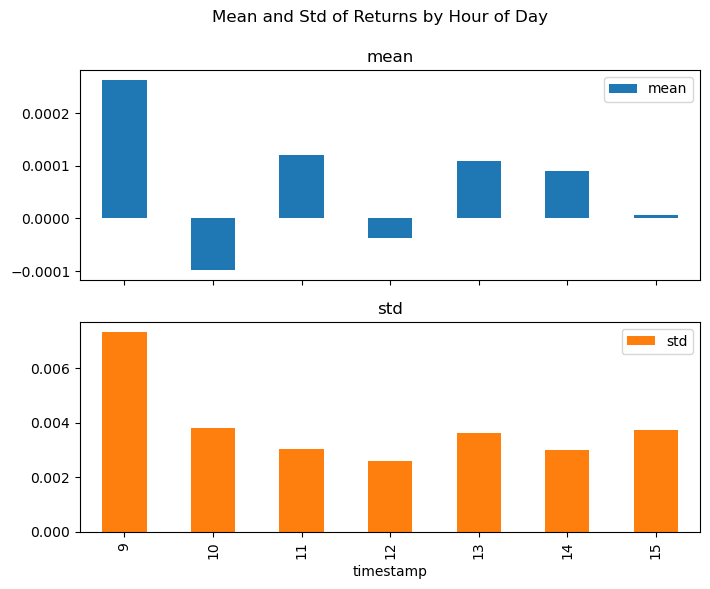

In [7]:
by_hour.plot(kind="bar", subplots=True, layout=(2,1), figsize=(8,6))
plt.suptitle("Mean and Std of Returns by Hour of Day")
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7341 entries, 2021-05-21 15:00:00 to 2025-07-08 12:00:00
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     7341 non-null   float64
 1   high     7341 non-null   float64
 2   low      7341 non-null   float64
 3   close    7341 non-null   float64
 4   ret      7341 non-null   float64
 5   log_ret  7341 non-null   float64
 6   vol_24h  7318 non-null   float64
dtypes: float64(7)
memory usage: 716.9 KB
